In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:

def cluster_text(text):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)

    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels = model.labels_
    clusters = pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return

global labels 
global clusters 

        

In [3]:
df = pd.read_csv('combined text data', index_col = 0)
df.head()

,name,strain_type,effect,may_relieve,aromas,flavors,rating,description,fav_count,sativa_comp,indica_comp,cbd,cbn,avg_thc,combined_text
0,s a g e sativa afghani genetic equilibrium ...,hybrid,energizing euphoria happy relaxi...,add adhd anxiety chronic pain de...,earthy herbal sage spicy woo...,sage spicy,4.8,s a g e is a popular marijuana strain that won...,621.0,0.5,0.5,0.00,0.00,0.19,s a g e sativa afghani genetic equilibrium ...
1,cannatonic marijuana strain,hybrid,calming happy mellow relaxing ...,anxiety chronic pain cramps head...,citrus earthy herbal lemon s...,citrus herbal sour spicy swe...,4.7,cannatonic is an evenly balanced hybrid strain...,1535.0,0.5,0.5,0.14,0.01,0.07,cannatonic marijuana strain calming happ...
2,blue dream marijuana strain,sativa dominant hybrid,creative energizing euphoria hap...,add adhd anxiety autism bipolar ...,earthy fruity sweet vanilla,berry blueberry fruity herbal ...,4.5,blue dream is a slightly sativa dominant hybri...,15731.0,0.6,0.4,0.02,0.01,0.17,blue dream marijuana strain creative ene...
3,goji og marijuana strain,sativa dominant hybrid,creative energizing euphoria hap...,chronic pain depression gastrointest...,cherry pungent sweet,berry cherry strawberry sweet ...,4.5,named after the bright red himalayan berry th...,301.0,0.8,0.2,0.01,0.00,0.22,goji og marijuana strain creative energi...
4,green love potion marijuana strain,indica dominant hybrid,aroused happy relaxing sleepy,anxiety chronic pain cramps depr...,earthy floral lavender pungent ...,chemical herbal lavender menthol...,4.5,being an indica dominant hybrid strain green ...,60.0,0.8,0.2,0.00,0.00,0.11,green love potion marijuana strain aroused ...


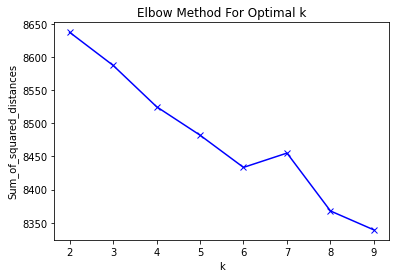

How many clusters do you want to use?
7
                                    title  cluster
38         white cookies marijuana strain        0
87           white runtz marijuana strain        0
147          white widow marijuana strain        0
163         white papaya marijuana strain        0
263          white death marijuana strain        0
...                                   ...      ...
8587  white lion tequila marijuana strain        0
8685     white bubblegum marijuana strain        0
8789        white forest marijuana strain        0
8826         white alien marijuana strain        0
8914          white yoda marijuana strain        0

[196 rows x 2 columns]
                                       title  cluster
2                blue dream marijuana strain        1
9               blue cheese marijuana strain        1
18        cookies and cream marijuana strain        1
54           bf blue cheese marijuana strain        1
98          australian blue marijuana strain        1


In [5]:
cluster_text(df['name'])

In [12]:
df['cluster'] = clusters

NameError: name 'clusters' is not defined